# 🏠 АНАЛИЗ РЫНКА НЕДВИЖИМОСТИ СИЭТТЛА

In [8]:
# Подготовка и импорты
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error
import warnings
warnings.filterwarnings('ignore')

# Настройка стиля графиков
plt.style.use('default')
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['font.size'] = 11
sns.set_palette("Set2")

In [10]:
# Загрузка и первичный осмотр данных
# Загружаем данные о домах
df = pd.read_csv('../data/kc_house_data.csv')

# Выводим базовую информацию
print("📊 ОСНОВНАЯ ИНФОРМАЦИЯ О ДАТАСЕТЕ")
print("=" * 40)
print(f"Размерность данных: {df.shape}")
print(f"Количество строк: {df.shape[0]:,}")
print(f"Количество столбцов: {df.shape[1]}")
print(f"Пропущенные значения: {df.isnull().sum().sum()}")

# Первые 5 строк данных
print("\n📋 ПЕРВЫЕ 5 СТРОК ДАННЫХ:")
df.head()

📊 ОСНОВНАЯ ИНФОРМАЦИЯ О ДАТАСЕТЕ
Размерность данных: (21613, 21)
Количество строк: 21,613
Количество столбцов: 21
Пропущенные значения: 0

📋 ПЕРВЫЕ 5 СТРОК ДАННЫХ:


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [11]:
# Описательная статистика
print("📈 ОПИСАТЕЛЬНАЯ СТАТИСТИКА")
print("=" * 30)
df[['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'grade']].describe()

📈 ОПИСАТЕЛЬНАЯ СТАТИСТИКА


,price,bedrooms,bathrooms,sqft_living,sqft_lot,grade
count,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000
mean,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,7.656873
std,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,1.175459
min,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000
25%,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,7.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,7.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,8.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,13.000000


In [12]:
# Анализ целевой переменной - цены
print("💰 АНАЛИЗ ЦЕН НА ДОМА")
print("=" * 25)
print(f"Средняя цена: ${df['price'].mean():,.0f}")
print(f"Медианная цена: ${df['price'].median():,.0f}")
print(f"Минимальная цена: ${df['price'].min():,.0f}")
print(f"Максимальная цена: ${df['price'].max():,.0f}")
print(f"Стандартное отклонение: ${df['price'].std():,.0f}")

💰 АНАЛИЗ ЦЕН НА ДОМА
Средняя цена: $540,088
Медианная цена: $450,000
Минимальная цена: $75,000
Максимальная цена: $7,700,000
Стандартное отклонение: $367,127


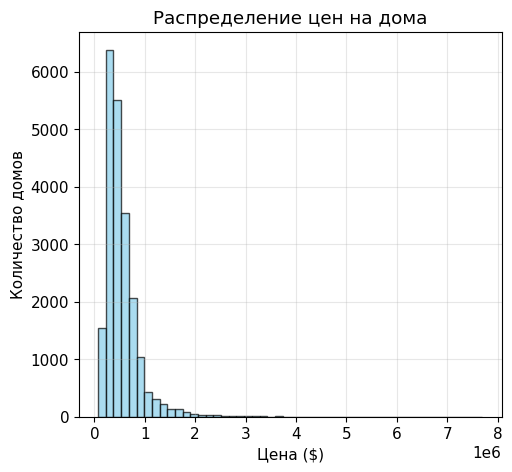

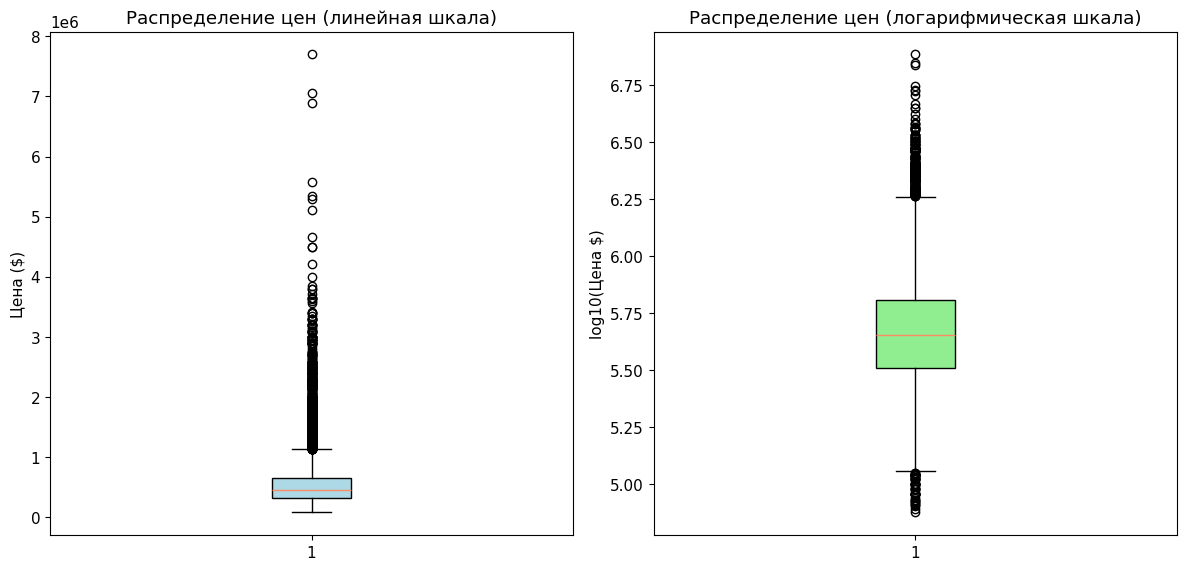

💰 СТАТИСТИКА ЦЕН:
25-й процентиль: $321,950
Медиана: $450,000
75-й процентиль: $645,000
Среднее: $540,088
Стандартное отклонение: $367,127


<Figure size 1000x600 with 0 Axes>

In [24]:
# Визуализация распределения цен
plt.figure(figsize=(12, 5))

# Гистограмма распределения цен
plt.subplot(1, 2, 1)
plt.hist(df['price'], bins=50, color='skyblue', alpha=0.7, edgecolor='black')
plt.title('Распределение цен на дома')
plt.xlabel('Цена ($)')
plt.ylabel('Количество домов')
plt.grid(True, alpha=0.3)

# Boxplot цен
plt.figure(figsize=(12, 6))

# Boxplot с логарифмической шкалой
plt.subplot(1, 2, 1)
plt.boxplot(df['price'], patch_artist=True, boxprops=dict(facecolor='lightblue'))
plt.title('Распределение цен (линейная шкала)')
plt.ylabel('Цена ($)')
plt.ticklabel_format(style='scientific', axis='y', scilimits=(0,0))

# Boxplot с логарифмической шкалой
plt.subplot(1, 2, 2)
plt.boxplot(np.log10(df['price']), patch_artist=True, boxprops=dict(facecolor='lightgreen'))
plt.title('Распределение цен (логарифмическая шкала)')
plt.ylabel('log10(Цена $)')

plt.tight_layout()
plt.show()

# Статистика
print("💰 СТАТИСТИКА ЦЕН:")
print(f"25-й процентиль: ${df['price'].quantile(0.25):,.0f}")
print(f"Медиана: ${df['price'].median():,.0f}")
print(f"75-й процентиль: ${df['price'].quantile(0.75):,.0f}")
print(f"Среднее: ${df['price'].mean():,.0f}")
print(f"Стандартное отклонение: ${df['price'].std():,.0f}")

plt.tight_layout()
plt.show()

In [14]:
# Анализ ключевых числовых признаков
print("📊 АНАЛИЗ КЛЮЧЕВЫХ ЧИСЛОВЫХ ПРИЗНАКОВ")
print("=" * 45)

# Жилая площадь
print(f"Жилая площадь:")
print(f"  Средняя: {df['sqft_living'].mean():.0f} sqft")
print(f"  Минимальная: {df['sqft_living'].min()} sqft")
print(f"  Максимальная: {df['sqft_living'].max()} sqft")

# Количество спален
print(f"\nКоличество спален:")
print(f"  Среднее: {df['bedrooms'].mean():.1f}")
print(f"  Максимальное: {df['bedrooms'].max()}")

# Оценка качества
print(f"\nОценка качества постройки:")
print(f"  Средняя: {df['grade'].mean():.1f}")
print(f"  Диапазон: {df['grade'].min()}-{df['grade'].max()}")

📊 АНАЛИЗ КЛЮЧЕВЫХ ЧИСЛОВЫХ ПРИЗНАКОВ
Жилая площадь:
  Средняя: 2080 sqft
  Минимальная: 290 sqft
  Максимальная: 13540 sqft

Количество спален:
  Среднее: 3.4
  Максимальное: 33

Оценка качества постройки:
  Средняя: 7.7
  Диапазон: 1-13


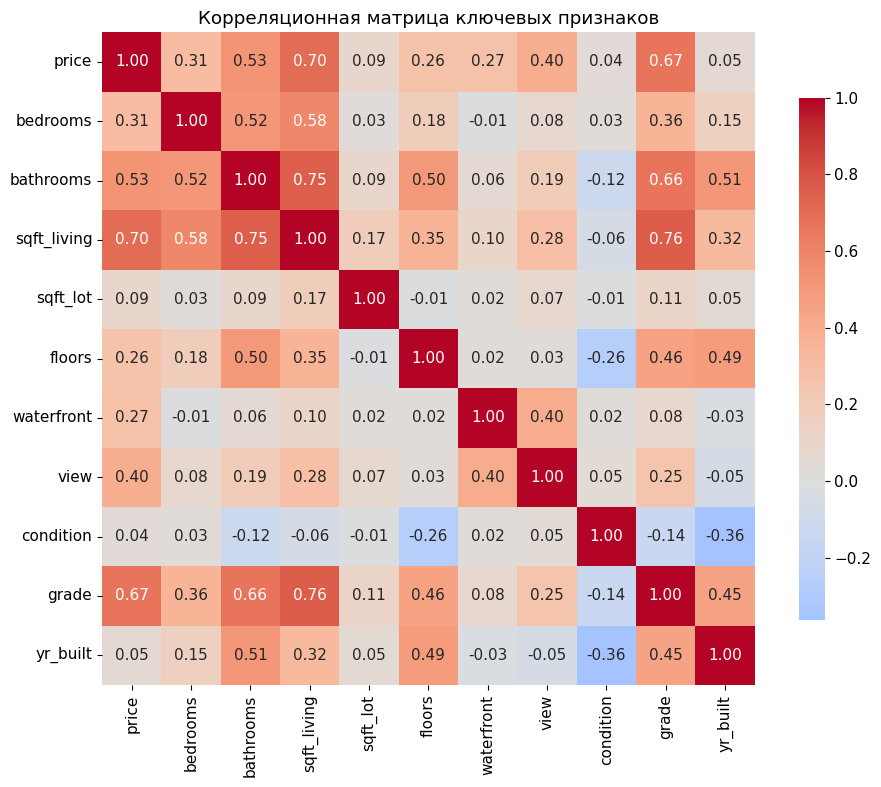

📊 ТОП-10 ПРИЗНАКОВ, КОРРЕЛИРУЮЩИХ С ЦЕНОЙ:
 1. sqft_living    :  0.702
 2. grade          :  0.667
 3. bathrooms      :  0.525
 4. view           :  0.397
 5. bedrooms       :  0.308
 6. waterfront     :  0.266
 7. floors         :  0.257
 8. sqft_lot       :  0.090
 9. yr_built       :  0.054
10. condition      :  0.036


In [15]:
# Корреляционный анализ
# Выбираем ключевые числовые признаки
key_features = ['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 
                'floors', 'waterfront', 'view', 'condition', 'grade', 'yr_built']

# Создаем корреляционную матрицу
correlation_matrix = df[key_features].corr()

# Визуализация корреляций
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, 
            fmt='.2f', square=True, cbar_kws={'shrink': 0.8})
plt.title('Корреляционная матрица ключевых признаков')
plt.tight_layout()
plt.show()

# Топ-10 корреляций с ценой
print("📊 ТОП-10 ПРИЗНАКОВ, КОРРЕЛИРУЮЩИХ С ЦЕНОЙ:")
price_correlations = df[key_features].corr()['price'].sort_values(ascending=False)
for i, (feature, corr) in enumerate(price_correlations[1:11].items(), 1):
    print(f"{i:2d}. {feature:15s}: {corr:6.3f}")

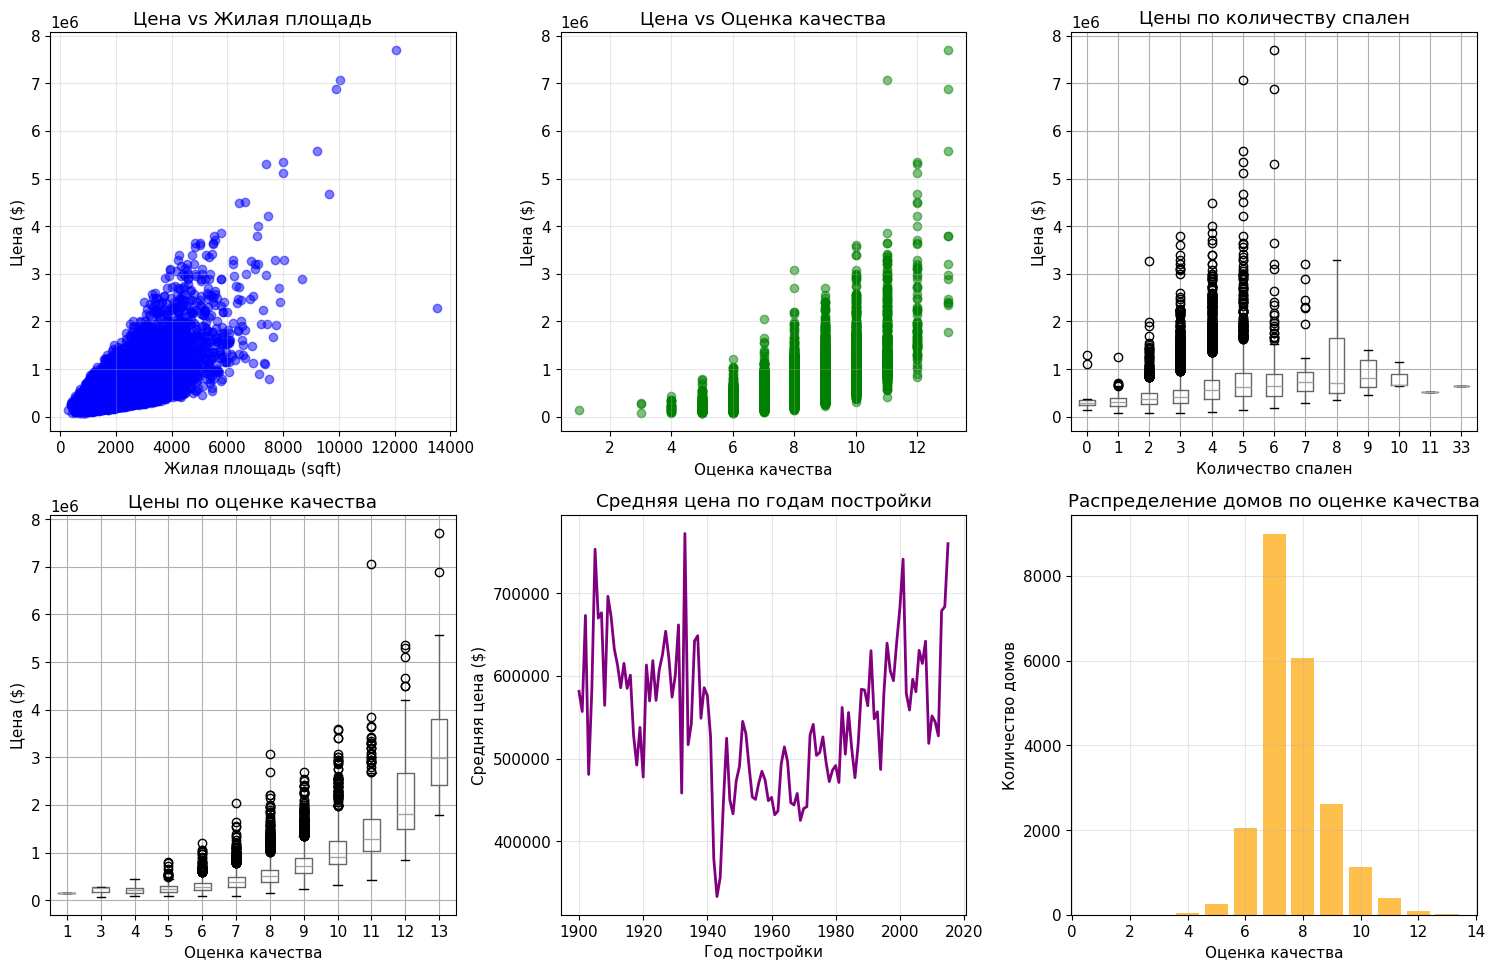

In [16]:
# Визуализация ключевых зависимостей
# Цена vs Жилая площадь
plt.figure(figsize=(15, 10))

plt.subplot(2, 3, 1)
plt.scatter(df['sqft_living'], df['price'], alpha=0.5, color='blue')
plt.title('Цена vs Жилая площадь')
plt.xlabel('Жилая площадь (sqft)')
plt.ylabel('Цена ($)')
plt.grid(True, alpha=0.3)

# Цена vs Оценка качества
plt.subplot(2, 3, 2)
plt.scatter(df['grade'], df['price'], alpha=0.5, color='green')
plt.title('Цена vs Оценка качества')
plt.xlabel('Оценка качества')
plt.ylabel('Цена ($)')
plt.grid(True, alpha=0.3)

# Распределение цен по количеству спален
plt.subplot(2, 3, 3)
df.boxplot(column='price', by='bedrooms', ax=plt.gca())
plt.title('Цены по количеству спален')
plt.xlabel('Количество спален')
plt.ylabel('Цена ($)')
plt.suptitle('')

# Распределение цен по оценке качества
plt.subplot(2, 3, 4)
df.boxplot(column='price', by='grade', ax=plt.gca())
plt.title('Цены по оценке качества')
plt.xlabel('Оценка качества')
plt.ylabel('Цена ($)')
plt.suptitle('')

# Цена по годам постройки
plt.subplot(2, 3, 5)
yearly_avg = df.groupby('yr_built')['price'].mean()
plt.plot(yearly_avg.index, yearly_avg.values, linewidth=2, color='purple')
plt.title('Средняя цена по годам постройки')
plt.xlabel('Год постройки')
plt.ylabel('Средняя цена ($)')
plt.grid(True, alpha=0.3)

# Распределение оценок качества
plt.subplot(2, 3, 6)
grade_counts = df['grade'].value_counts().sort_index()
plt.bar(grade_counts.index, grade_counts.values, color='orange', alpha=0.7)
plt.title('Распределение домов по оценке качества')
plt.xlabel('Оценка качества')
plt.ylabel('Количество домов')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [17]:
# Подготовка данных для машинного обучения
print("🤖 ПОДГОТОВКА ДАННЫХ ДЛЯ МАШИННОГО ОБУЧЕНИЯ")
print("=" * 50)

# Выбираем признаки для моделирования
features = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 
           'waterfront', 'view', 'condition', 'grade', 'yr_built']

X = df[features]
y = df['price']

# Разделяем данные на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"📊 Размер обучающей выборки: {X_train.shape[0]:,} домов")
print(f"📊 Размер тестовой выборки: {X_test.shape[0]:,} домов")
print(f"📊 Количество признаков: {X_train.shape[1]}")
print(f"🎯 Целевая переменная: цена дома")

🤖 ПОДГОТОВКА ДАННЫХ ДЛЯ МАШИННОГО ОБУЧЕНИЯ
📊 Размер обучающей выборки: 17,290 домов
📊 Размер тестовой выборки: 4,323 домов
📊 Количество признаков: 10
🎯 Целевая переменная: цена дома


In [40]:
# 📈 МОДЕЛЬ 1: ЛИНЕЙНАЯ РЕГРЕССИЯ (с масштабированием)
from sklearn.preprocessing import StandardScaler

# Масштабирование признаков
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Создаем и обучаем модель на масштабированных данных
lr_model_scaled = LinearRegression()
lr_model_scaled.fit(X_train_scaled, y_train)

# Делаем предсказания
lr_pred_scaled = lr_model_scaled.predict(X_test_scaled)

# Рассчитываем метрики качества
lr_mae_scaled = mean_absolute_error(y_test, lr_pred_scaled)
lr_r2_scaled = r2_score(y_test, lr_pred_scaled)
lr_rmse_scaled = np.sqrt(mean_squared_error(y_test, lr_pred_scaled))

print("📊 МЕТРИКИ КАЧЕСТВА (с масштабированием):")
print(f"   MAE: ${lr_mae_scaled:,.0f}")
print(f"   RMSE: ${lr_rmse_scaled:,.0f}")
print(f"   R²: {lr_r2_scaled:.3f}")

# Важность признаков (коэффициенты после масштабирования)
feature_importance_lr_scaled = pd.DataFrame({
    'feature': features,
    'coefficient': lr_model_scaled.coef_,
    'abs_coefficient': np.abs(lr_model_scaled.coef_)
}).sort_values('coefficient', key=abs, ascending=False)

print("\n🔑 ИНТЕРПРЕТАЦИЯ КОЭФФИЦИЕНТОВ (после масштабирования):")
print("=" * 55)
for idx, row in feature_importance_lr_scaled.head(8).iterrows():
    feature = row['feature']
    coef = row['coefficient']
    print(f"📊 {feature:15s}: {coef:+.2f}")

📊 МЕТРИКИ КАЧЕСТВА (с масштабированием):
   MAE: $143,710
   RMSE: $229,315
   R²: 0.652

🔑 ИНТЕРПРЕТАЦИЯ КОЭФФИЦИЕНТОВ (после масштабирования):
📊 sqft_living    : +154072.24
📊 grade          : +143377.08
📊 yr_built       : -108068.82
📊 waterfront     : +46602.59
📊 bathrooms      : +38349.91
📊 bedrooms       : -35820.31
📊 view           : +35099.90
📊 floors         : +13507.33


In [41]:
# Модель 2: Random Forest
print("🌳 МОДЕЛЬ 2: RANDOM FOREST")
print("=" * 28)

# Создаем и обучаем модель
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Делаем предсказания
rf_pred = rf_model.predict(X_test)

# Рассчитываем метрики качества
rf_mae = mean_absolute_error(y_test, rf_pred)
rf_r2 = r2_score(y_test, rf_pred)
rf_rmse = np.sqrt(mean_squared_error(y_test, rf_pred))

print("📊 МЕТРИКИ КАЧЕСТВА:")
print(f"   MAE (средняя абсолютная ошибка): ${rf_mae:,.0f}")
print(f"   RMSE (среднеквадратичная ошибка): ${rf_rmse:,.0f}")
print(f"   R² (коэффициент детерминации): {rf_r2:.3f}")
print(f"   Модель объясняет {rf_r2*100:.1f}% дисперсии цены")

# Анализ важности признаков для Random Forest
feature_importance_rf = pd.DataFrame({
    'feature': features,
    'importance': rf_model.feature_importances_
}).sort_values('importance', ascending=False)

print(f"\n🔑 ВАЖНОСТЬ ПРИЗНАКОВ (Random Forest):")
print(feature_importance_rf)

🌳 МОДЕЛЬ 2: RANDOM FOREST
📊 МЕТРИКИ КАЧЕСТВА:
   MAE (средняя абсолютная ошибка): $128,075
   RMSE (среднеквадратичная ошибка): $217,570
   R² (коэффициент детерминации): 0.687
   Модель объясняет 68.7% дисперсии цены

🔑 ВАЖНОСТЬ ПРИЗНАКОВ (Random Forest):
       feature  importance
8        grade    0.363077
2  sqft_living    0.313481
9     yr_built    0.120918
3     sqft_lot    0.076768
1    bathrooms    0.039669
5   waterfront    0.026516
6         view    0.022717
0     bedrooms    0.014864
7    condition    0.012007
4       floors    0.009983


🆚 СРАВНЕНИЕ МОДЕЛЕЙ


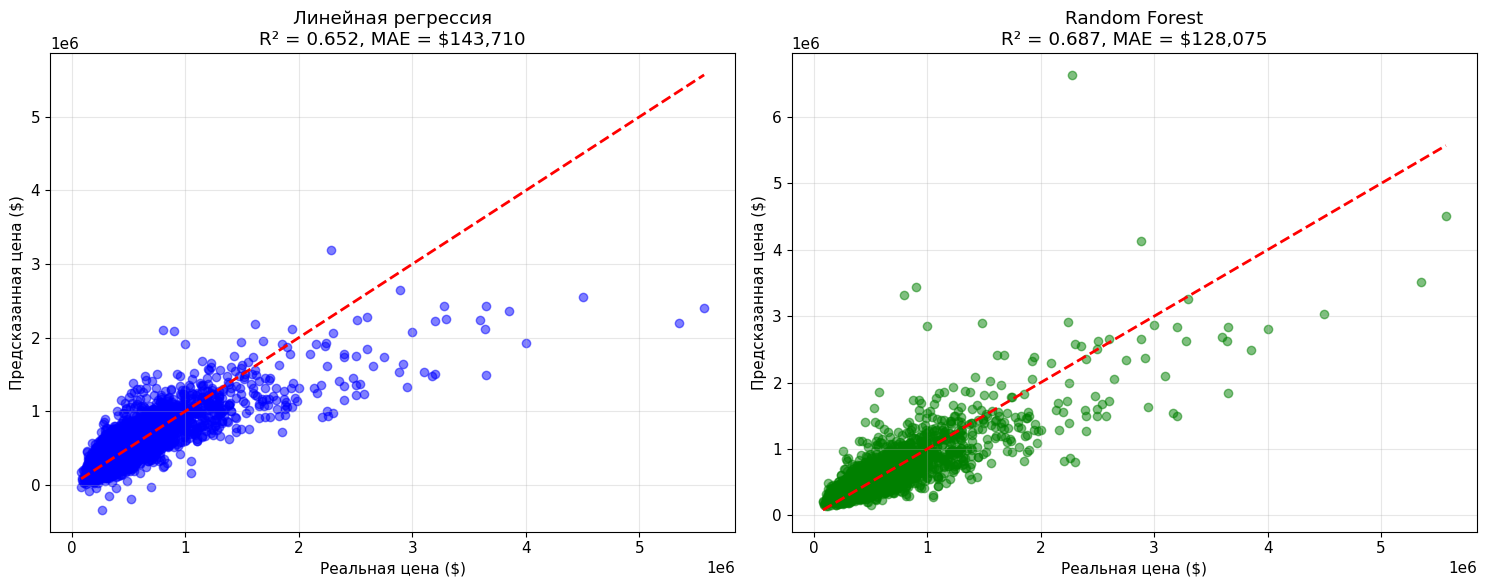

📊 СВОДКА ПО МОДЕЛЯМ:
   Линейная регрессия: R² = 0.652, MAE = $143,710
   Random Forest:      R² = 0.687, MAE = $128,075


In [42]:
# Сравнение моделей
print("🆚 СРАВНЕНИЕ МОДЕЛЕЙ")
print("=" * 25)

# Визуализация результатов
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Линейная регрессия: предсказанные vs реальные
axes[0].scatter(y_test, lr_pred_scaled, alpha=0.5, color='blue')
axes[0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
axes[0].set_xlabel('Реальная цена ($)')
axes[0].set_ylabel('Предсказанная цена ($)')
axes[0].set_title(f'Линейная регрессия\nR² = {lr_r2_scaled:.3f}, MAE = ${lr_mae_scaled:,.0f}')
axes[0].grid(True, alpha=0.3)

# Random Forest: предсказанные vs реальные
axes[1].scatter(y_test, rf_pred, alpha=0.5, color='green')
axes[1].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
axes[1].set_xlabel('Реальная цена ($)')
axes[1].set_ylabel('Предсказанная цена ($)')
axes[1].set_title(f'Random Forest\nR² = {rf_r2:.3f}, MAE = ${rf_mae:,.0f}')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("📊 СВОДКА ПО МОДЕЛЯМ:")
print(f"   Линейная регрессия: R² = {lr_r2_scaled:.3f}, MAE = ${lr_mae_scaled:,.0f}")
print(f"   Random Forest:      R² = {rf_r2:.3f}, MAE = ${rf_mae:,.0f}")

🔑 СРАВНЕНИЕ ВАЖНОСТИ ПРИЗНАКОВ


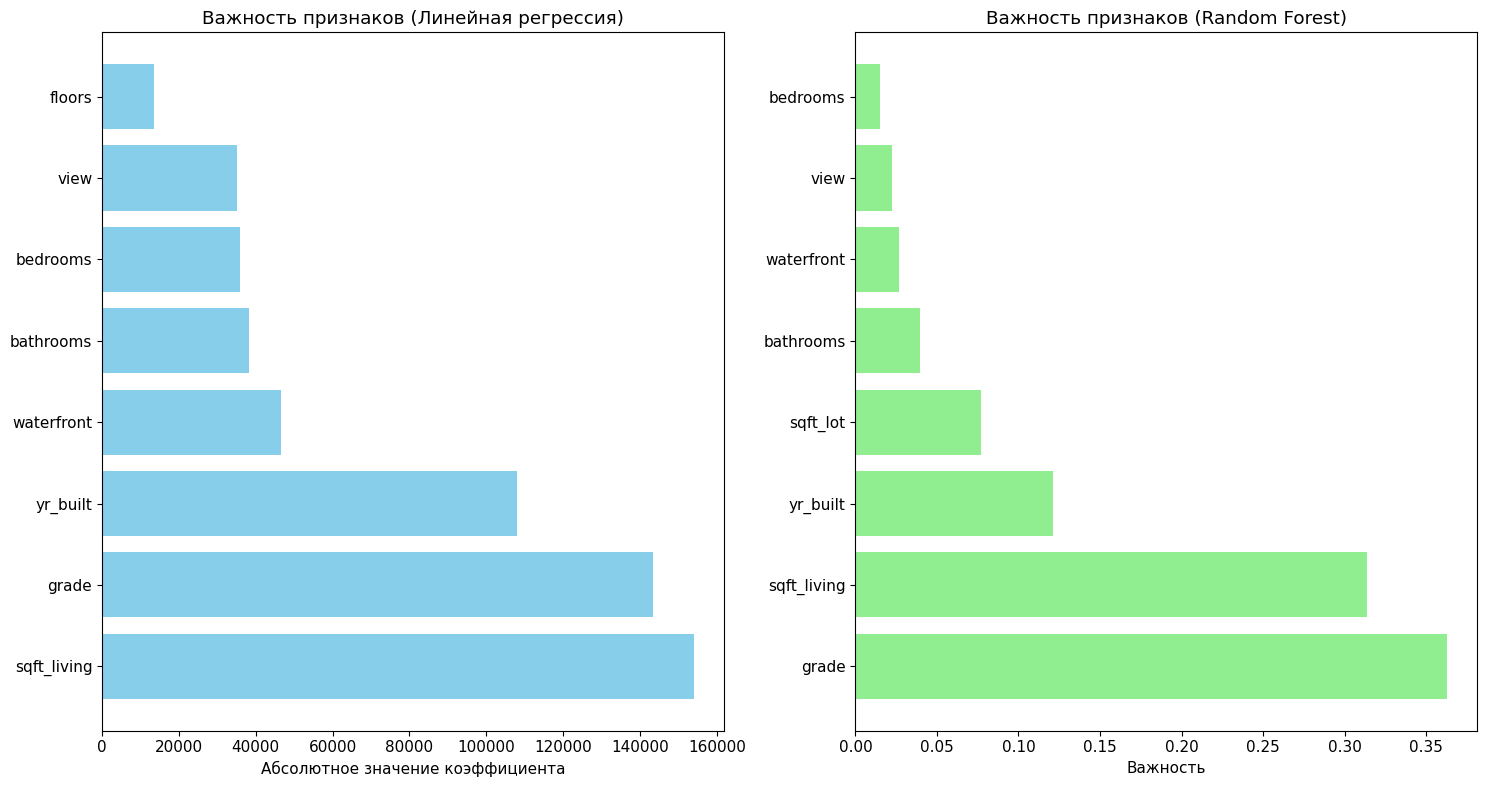

In [43]:
# Анализ важности признаков для обеих моделей
print("🔑 СРАВНЕНИЕ ВАЖНОСТИ ПРИЗНАКОВ")
print("=" * 35)

# Визуализация важности признаков
fig, axes = plt.subplots(1, 2, figsize=(15, 8))

# Линейная регрессия (по абсолютным значениям коэффициентов)
top_features_lr = feature_importance_lr_scaled.head(8)
axes[0].barh(top_features_lr['feature'], top_features_lr['abs_coefficient'], color='skyblue')
axes[0].set_title('Важность признаков (Линейная регрессия)')
axes[0].set_xlabel('Абсолютное значение коэффициента')

# Random Forest
top_features_rf = feature_importance_rf.head(8)
axes[1].barh(top_features_rf['feature'], top_features_rf['importance'], color='lightgreen')
axes[1].set_title('Важность признаков (Random Forest)')
axes[1].set_xlabel('Важность')

plt.tight_layout()
plt.show()

📋 КЛЮЧЕВЫЕ ВЫВОДЫ ПРОЕКТА


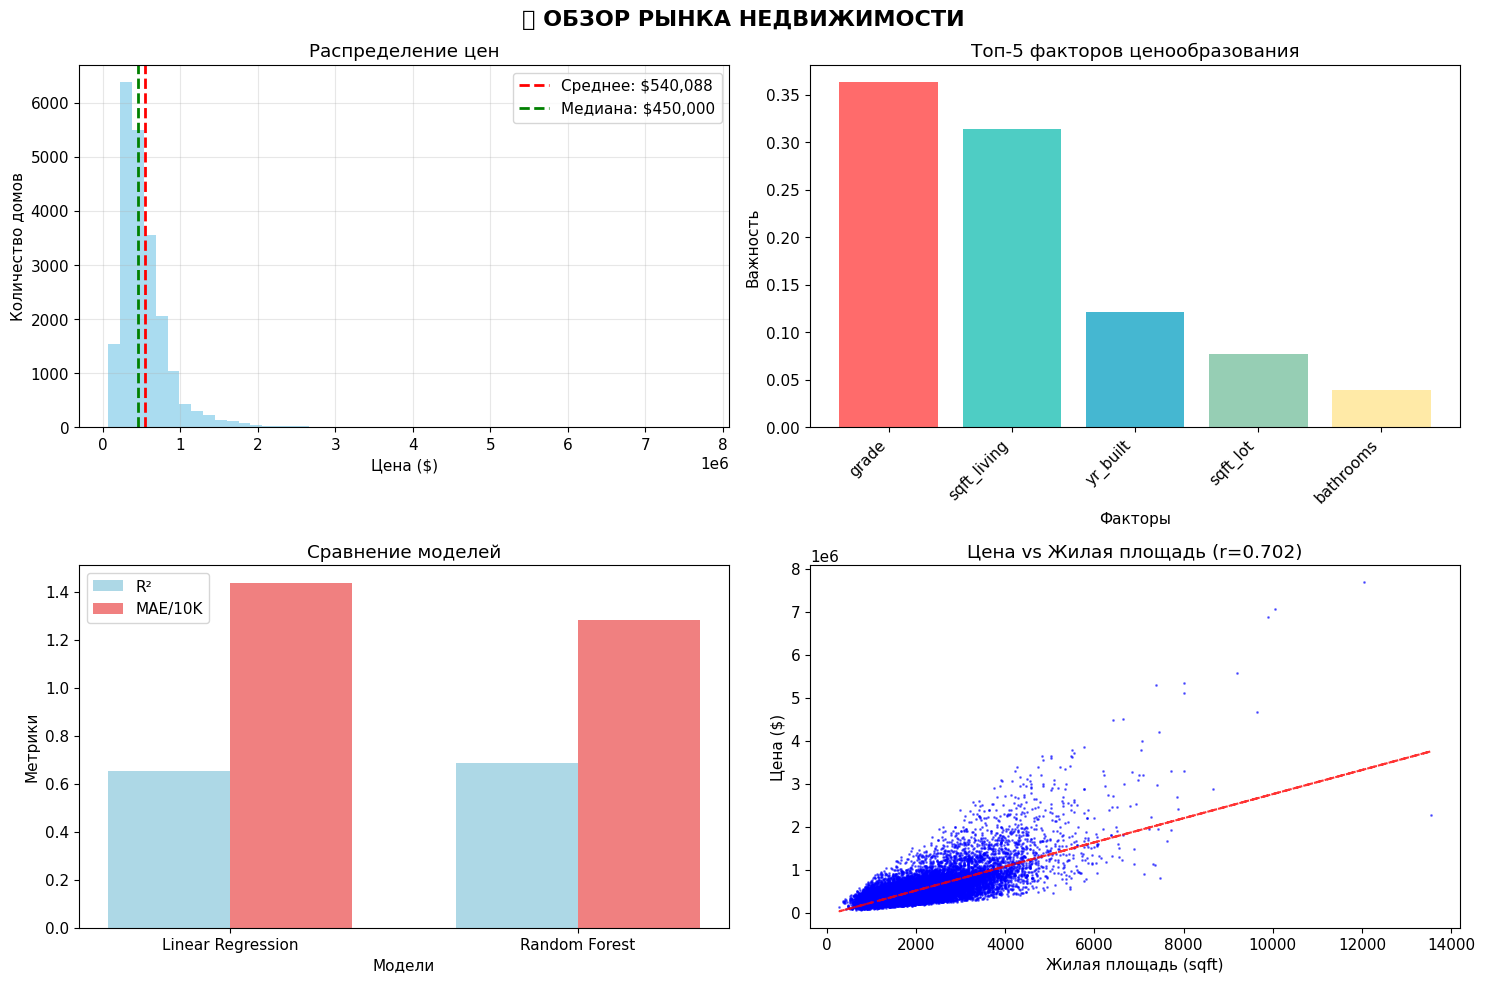

🎯 ГЛАВНЫЕ ВЫВОДЫ:
1. 🏠 СРЕДНЯЯ ЦЕНА ДОМА: $540,088
2. 🌟 ЛУЧШАЯ МОДЕЛЬ: Random Forest (R² = 0.687)
3. 🔑 ГЛАВНЫЙ ФАКТОР: grade (0.363)
4. 💡 ТОЧНОСТЬ: ±$128,075 в среднем
5. 📈 ПОЛЕЗНОСТЬ: Модель объясняет 68.7% вариации цен


In [44]:
# Интерактивные выводы с графиками
print("📋 КЛЮЧЕВЫЕ ВЫВОДЫ ПРОЕКТА")
print("=" * 40)

# 1. Market Overview Dashboard
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('📈 ОБЗОР РЫНКА НЕДВИЖИМОСТИ', fontsize=16, fontweight='bold')

# Распределение цен
axes[0,0].hist(df['price'], bins=50, alpha=0.7, color='skyblue')
axes[0,0].axvline(df['price'].mean(), color='red', linestyle='--', linewidth=2, label=f'Среднее: ${df["price"].mean():,.0f}')
axes[0,0].axvline(df['price'].median(), color='green', linestyle='--', linewidth=2, label=f'Медиана: ${df["price"].median():,.0f}')
axes[0,0].set_title('Распределение цен')
axes[0,0].set_xlabel('Цена ($)')
axes[0,0].set_ylabel('Количество домов')
axes[0,0].legend()
axes[0,0].grid(True, alpha=0.3)

# Топ факторов ценообразования
top_factors = feature_importance_rf.head(5)
bars = axes[0,1].bar(range(len(top_factors)), top_factors['importance'], color=['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4', '#FFEAA7'])
axes[0,1].set_title('Топ-5 факторов ценообразования')
axes[0,1].set_xlabel('Факторы')
axes[0,1].set_ylabel('Важность')
axes[0,1].set_xticks(range(len(top_factors)))
axes[0,1].set_xticklabels(top_factors['feature'], rotation=45, ha='right')

# Сравнение моделей
models = ['Linear Regression', 'Random Forest']
r2_scores = [lr_r2_scaled, rf_r2]
mae_scores = [lr_mae_scaled/1000, rf_mae/1000]  # в тысячах долларов

x = np.arange(len(models))
width = 0.35

axes[1,0].bar(x - width/2, r2_scores, width, label='R²', color='lightblue')
axes[1,0].bar(x + width/2, [mae/100 for mae in mae_scores], width, label='MAE/10K', color='lightcoral')
axes[1,0].set_title('Сравнение моделей')
axes[1,0].set_xlabel('Модели')
axes[1,0].set_ylabel('Метрики')
axes[1,0].set_xticks(x)
axes[1,0].set_xticklabels(models)
axes[1,0].legend()

# Price vs Living Area (с трендом)
axes[1,1].scatter(df['sqft_living'], df['price'], alpha=0.5, color='blue', s=1)
# Добавим линию тренда
z = np.polyfit(df['sqft_living'], df['price'], 1)
p = np.poly1d(z)
axes[1,1].plot(df['sqft_living'], p(df['sqft_living']), "r--", alpha=0.8)
axes[1,1].set_title(f'Цена vs Жилая площадь (r={df["sqft_living"].corr(df["price"]):.3f})')
axes[1,1].set_xlabel('Жилая площадь (sqft)')
axes[1,1].set_ylabel('Цена ($)')

plt.tight_layout()
plt.show()

# Четкие выводы
print("🎯 ГЛАВНЫЕ ВЫВОДЫ:")
print(f"1. 🏠 СРЕДНЯЯ ЦЕНА ДОМА: ${df['price'].mean():,.0f}")
print(f"2. 🌟 ЛУЧШАЯ МОДЕЛЬ: Random Forest (R² = {rf_r2:.3f})")
print(f"3. 🔑 ГЛАВНЫЙ ФАКТОР: {feature_importance_rf.iloc[0]['feature']} ({feature_importance_rf.iloc[0]['importance']:.3f})")
print(f"4. 💡 ТОЧНОСТЬ: ±${rf_mae:,.0f} в среднем")
print(f"5. 📈 ПОЛЕЗНОСТЬ: Модель объясняет {rf_r2*100:.1f}% вариации цен")

In [31]:
# Сохраняем важность признаков
feature_importance_rf.to_csv('../result/feature_importance.csv', index=False)
print(f"\n💾 Результаты важности признаков сохранены в 'feature_importance.csv'")
print("🎉 АНАЛИЗ ЗАВЕРШЕН!")


💾 Результаты важности признаков сохранены в 'feature_importance.csv'
🎉 АНАЛИЗ ЗАВЕРШЕН!
